In [3]:
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [4]:
# Makes utils module visible
# Note - this is probably bad practice, but will work with this at the moment
import sys
sys.path.append('../')

In [5]:
import pandas as pd
import numpy as np

from utils.utils import *

Perform analysis on the processed das data

In [8]:
# Import modules
import seaborn as sns
from scipy import signal
import matplotlib.pyplot as plt
import pyoma2 as oma

# ======== PRE-PROCESSING =====================================================
# To open a .txt file create a variable containing the path to the file
# _file = "./test.txt" # Path to the txt file

# # open the file with pandas and create a dataframe
# # N.B. whatchout for header, separator and remove time column if present
# data = pd.read_csv(_file, header=0, sep="\t", index_col=False) 
# data = data.to_numpy()

# to retrieve the example data 
# data, (fex, FI_ex, xi_ex) = oma.Exdata()

ModuleNotFoundError: No module named 'matplotlib.artist'

In [5]:
# sampling rate = 100 Hz
fs = 100

In [7]:
# load in data
das_dir = r'F:\enel-data\short-exp-march-2024\das\cut-data\brake'
input_file_name = 'brake-bc6'

strain,_,_ = load_preprocessed_das_data(directory_to_file=das_dir,
                                                         input_file_name=input_file_name)

In [9]:
bot_name = 'bot_a'
mid_name = 'mid_b'
top_name = 'top_c'


total_strain = np.vstack([strain[bot_name].T, strain[mid_name].T, strain[top_name].T]) /10430.378350470453

In [12]:
print(np.shape(total_strain))

(73, 61999)


In [24]:
%matplotlib inline


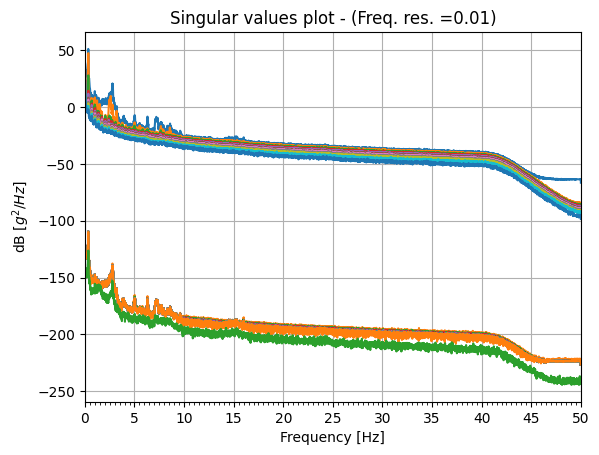

In [25]:
# Run FDD

FDD = oma.FDDsvp(total_strain.T,  fs)

In [27]:
FreQ = [0.3,.9,2.6,5]

In [28]:
Res_FDD = oma.FDDmodEX(FreQ, FDD[1])

In [35]:
print(Res_FDD['Frequencies'])
# Res_FDD['Mode Shapes']


[0.31 0.91 2.59 5.01]


In [36]:
# load in data
das_dir = r'F:\enel-data\short-exp-march-2024\das\cut-data\brake'
input_file_name = 'brake-bc5'

strain,_,_ = load_preprocessed_das_data(directory_to_file=das_dir,
                                                         input_file_name=input_file_name)

In [37]:
bot_name = 'bot_a'
mid_name = 'mid_b'
top_name = 'top_c'


total_strain = np.vstack([strain[bot_name].T, strain[mid_name].T, strain[top_name].T]) /10430.378350470453

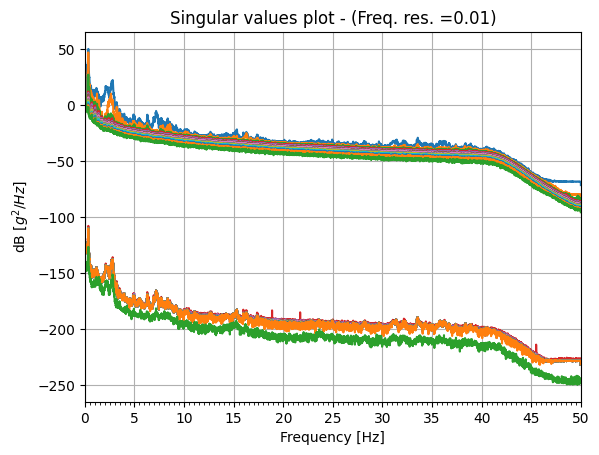

In [38]:
# Run FDD

FDD = oma.FDDsvp(total_strain.T,  fs)

In [40]:
FreQ = [0.3,.9,2.6,5]

In [41]:
Res_FDD = oma.FDDmodEX(FreQ, FDD[1])

In [42]:
print(Res_FDD['Frequencies'])
# Res_FDD['Mode Shapes']

[0.29 0.91 2.58 4.98]


In [44]:
# Run SSI
br = 15
SSIcov= oma.SSIcovStaDiag(total_strain.T, fs, br) # running SSI-cov
SSIdat = oma.SSIdatStaDiag(total_strain.T, fs, br, ordmax=60, lim=(0.01, 0.05, 0.02, 0.1))